In [56]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [57]:
url="C:/Users/Administrator/Downloads/AgencyDataset.xlsx"
df=pd.read_excel(url)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


# I.DATA EXPLORATION AND CLEANING:

In [58]:
#what information can we get from this data

In [59]:
print(df.shape)
#we have 4600 rows and 18 columns to work with


#number of observations/raws
n = df.shape[0]
#number of variables/colonnes
p = df.shape[1]

(4600, 18)


# 1- FILTERING UNNECESSARY COLUMNS


In [60]:
print("Number of unique values of street :  ",len(df["street"].unique()))
#street is useless as we have almost a unique value for each raw and add no useful information to our data so we drop it

print("Number of unique values of country :  ",len(df["country"].unique()))
#country is useless as we have only one value ==>USA we can drop

print("Number of unique values of statezip :  ",len(df["statezip"].unique()))
print("Number of unique values of city :  ",len(df["city"].unique()))
#The statezip and city may be important to our model so we can keep it for now

Number of unique values of street :   4525
Number of unique values of country :   1
Number of unique values of statezip :   77
Number of unique values of city :   44


In [61]:
#Logicaly we see that the date column is useless for our model so we decided to drop it

In [7]:
df.drop("date",axis='columns',inplace=True) #inplace=True -> will make changes on the df
df.drop("country",axis='columns',inplace=True)
df.drop("street",axis='columns',inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042
3,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,WA 98133
4596,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,WA 98007
4597,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton,WA 98059
4598,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,WA 98178


# 2-Numeric Values Check


In [8]:
#we can take a first impression about how our numeric values are distributed
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [9]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
city              object
statezip          object
dtype: object

In [10]:
#We remark that the number of bathrooms, floors take float numbers. Plus for some occasions we noticed that the number of bedrooms
#take irrational numbers which is odd!


In [11]:
df.iloc[:,[2,5]]

,bathrooms,floors
0,1.50,1.5
1,2.50,2.0
2,2.00,1.0
3,2.25,1.0
4,2.50,1.0
...,...,...
4595,1.75,1.0
4596,2.50,2.0
4597,2.50,2.0
4598,2.00,1.0


In [12]:
#We have to round these floats and convert them to ints

In [13]:
df['bathrooms']=df['bathrooms'].round()
df['bathrooms']=df['bathrooms'].astype(int)
df['bathrooms']=df['bathrooms'].apply(int)

In [14]:
df['floors']=df['floors'].round()
df['floors']=df['floors'].astype(int)
df['floors']=df['floors'].apply(int)

# 3-Missing Values Check

In [15]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
statezip         0
dtype: int64

In [16]:
#we remark  that we dont have any NAN data 

In [17]:
df[df.price==0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
4354,0.0,3,2,1490,10125,1,0,0,4,1490,0,1962,0,Federal Way,WA 98001
4356,0.0,4,3,2600,5390,1,0,0,4,1300,1300,1960,2001,Seattle,WA 98199
4357,0.0,6,3,3200,9200,1,0,2,4,1600,1600,1953,1983,Burien,WA 98146
4358,0.0,5,4,3480,36615,2,0,0,4,2490,990,1983,0,Issaquah,WA 98075
4361,0.0,5,2,1500,7112,1,0,0,5,760,740,1920,0,Burien,WA 98166
4362,0.0,4,4,3680,18804,2,0,0,3,3680,0,1990,2009,Sammamish,WA 98074
4374,0.0,2,2,2200,188200,1,0,3,3,2200,0,2007,0,Enumclaw,WA 98022
4376,0.0,4,2,2170,10500,1,0,2,4,1270,900,1960,2001,Normandy Park,WA 98166
4382,0.0,5,4,4630,6324,2,0,0,3,3210,1420,2006,0,Snoqualmie,WA 98065
4383,0.0,5,4,4430,9000,2,0,0,3,4430,0,2013,1923,Bellevue,WA 98004


In [18]:
#But we remark that some houses have the price of 0 so we can consider them as missing values.
#We can simply get rid of these columns

In [19]:
df=df[df.price!=0]

In [20]:
df['sqft_basement'] = df['sqft_basement'].replace(0,np.nan)
mean_price = df['sqft_basement'].mean()
df=df.fillna(mean_price)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_9768/251016882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sqft_basement'] = df['sqft_basement'].replace(0,np.nan)


In [21]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.130000e+05,3,2,1340,7912,2,0,0,3,1340,770.046372,1955,2005,Shoreline,WA 98133
1,2.384000e+06,5,2,3650,9050,2,0,4,5,3370,280.000000,1921,0,Seattle,WA 98119
2,3.420000e+05,3,2,1930,11947,1,0,0,4,1930,770.046372,1966,0,Kent,WA 98042
3,4.200000e+05,3,2,2000,8030,1,0,0,4,1000,1000.000000,1963,0,Bellevue,WA 98008
4,5.500000e+05,4,2,1940,10500,1,0,0,4,1140,800.000000,1976,1992,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,2,1510,6360,1,0,0,4,1510,770.046372,1954,1979,Seattle,WA 98133
4596,5.343333e+05,3,2,1460,7573,2,0,0,3,1460,770.046372,1983,2009,Bellevue,WA 98007
4597,4.169042e+05,3,2,3010,7014,2,0,0,3,3010,770.046372,2009,0,Renton,WA 98059
4598,2.034000e+05,4,2,2090,6630,1,0,0,3,1070,1020.000000,1974,0,Seattle,WA 98178


# 5-Finding outliers 

In [22]:
import seaborn as sns
sns.set(rc={'figure.figsize':(30,10)})

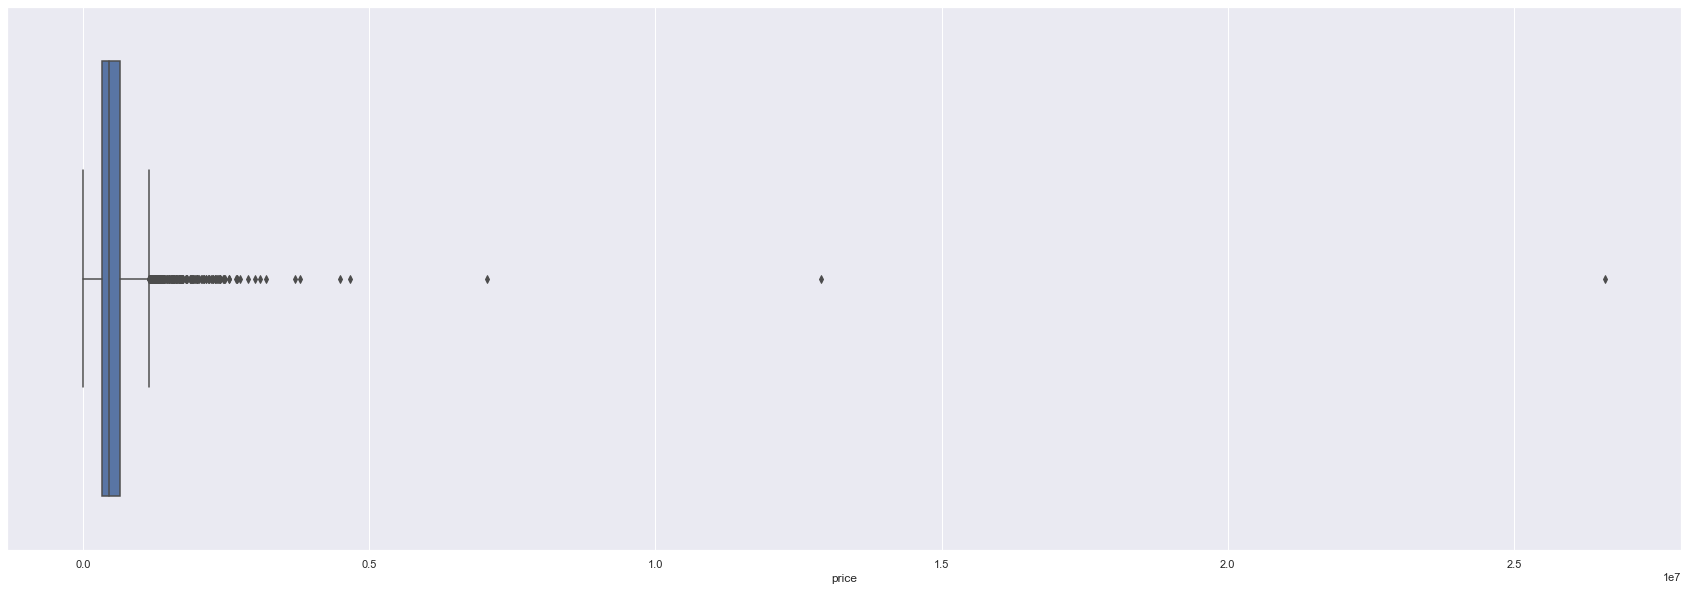

In [23]:
ax=sns.boxplot(x=df["price"])

In [24]:
#We remark that we have outilers for the price column

In [25]:
#Lets delete the raws with outlier values in the price column

In [26]:
q1,q3 = np.percentile(df["price"],[25,75])

print(q1,q3)

326264.2857145 657500.0


In [27]:
iqr=q3-q1
iqr

331235.7142855

In [28]:
lower_whisker=q1-(1.5*iqr)
upper_whisker=q3+(1.5*iqr)

print(lower_whisker,upper_whisker)

-170589.28571375 1154353.57142825


In [29]:
#outliers for the price columns

df[(df["price"]>upper_whisker)|(df["price"]<lower_whisker)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
1,2.384000e+06,5,2,3650,9050,2,0,4,5,3370,280.000000,1921,0,Seattle,WA 98119
11,1.400000e+06,4,2,2920,4000,2,0,0,5,1910,1010.000000,1909,1988,Seattle,WA 98105
14,1.200000e+06,5,3,2910,9480,2,0,0,3,2910,770.046372,1939,1969,Seattle,WA 98105
99,1.395000e+06,5,4,4010,8510,2,0,1,5,2850,1160.000000,1971,0,Seattle,WA 98105
122,2.280000e+06,7,8,13540,307752,3,0,4,3,9410,4130.000000,1999,0,Redmond,WA 98053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,2.199900e+06,4,2,1120,5427,1,0,0,3,1120,770.046372,1969,2014,Covington,WA 98042
4350,2.659000e+07,3,2,1180,7793,1,0,0,4,1180,770.046372,1992,0,Kent,WA 98031
4465,2.560498e+06,3,2,1710,1664,2,0,0,5,1300,410.000000,2003,0,Seattle,WA 98199
4467,1.337044e+06,4,4,4280,9583,2,0,0,3,4280,770.046372,2005,0,Bellevue,WA 98004


In [30]:
#Dropping the price outliers
df=df[(df["price"]<upper_whisker)&(df["price"]>lower_whisker)]
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.000000,3,2,1340,7912,2,0,0,3,1340,770.046372,1955,2005,Shoreline,WA 98133
2,342000.000000,3,2,1930,11947,1,0,0,4,1930,770.046372,1966,0,Kent,WA 98042
3,420000.000000,3,2,2000,8030,1,0,0,4,1000,1000.000000,1963,0,Bellevue,WA 98008
4,550000.000000,4,2,1940,10500,1,0,0,4,1140,800.000000,1976,1992,Redmond,WA 98052
5,490000.000000,2,1,880,6380,1,0,0,3,880,770.046372,1938,1994,Seattle,WA 98115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3,2,1510,6360,1,0,0,4,1510,770.046372,1954,1979,Seattle,WA 98133
4596,534333.333333,3,2,1460,7573,2,0,0,3,1460,770.046372,1983,2009,Bellevue,WA 98007
4597,416904.166667,3,2,3010,7014,2,0,0,3,3010,770.046372,2009,0,Renton,WA 98059
4598,203400.000000,4,2,2090,6630,1,0,0,3,1070,1020.000000,1974,0,Seattle,WA 98178


# 6-Categorizing Data


In [31]:
#Now lets examine our other columns with this function:

def print_unique_col_values(df):
    cat_col=[] #will contain the column name of the categorical columns
    for column in df:
        if df[column].dtypes=='object':
            cat_col.append(column)
            print(f'{column}  :  {df[column].unique()}')
    return cat_col

In [32]:
cat_col=print_unique_col_values(df)
#we remark that these columns contain categorical data with repeated values

city  :  ['Shoreline' 'Kent' 'Bellevue' 'Redmond' 'Seattle' 'Maple Valley'
 'North Bend' 'Lake Forest Park' 'Sammamish' 'Auburn' 'Des Moines'
 'Bothell' 'Federal Way' 'Kirkland' 'Issaquah' 'Woodinville'
 'Normandy Park' 'Fall City' 'Renton' 'Carnation' 'Snoqualmie' 'Duvall'
 'Burien' 'Covington' 'Inglewood-Finn Hill' 'Kenmore' 'Newcastle'
 'Black Diamond' 'Ravensdale' 'Clyde Hill' 'Algona' 'Mercer Island'
 'Skykomish' 'Tukwila' 'Vashon' 'SeaTac' 'Enumclaw' 'Snoqualmie Pass'
 'Pacific' 'Beaux Arts Village' 'Preston' 'Milton' 'Yarrow Point' 'Medina']
statezip  :  ['WA 98133' 'WA 98042' 'WA 98008' 'WA 98052' 'WA 98115' 'WA 98038'
 'WA 98045' 'WA 98155' 'WA 98074' 'WA 98106' 'WA 98007' 'WA 98092'
 'WA 98198' 'WA 98006' 'WA 98102' 'WA 98011' 'WA 98125' 'WA 98003'
 'WA 98136' 'WA 98033' 'WA 98029' 'WA 98117' 'WA 98034' 'WA 98072'
 'WA 98023' 'WA 98107' 'WA 98166' 'WA 98116' 'WA 98024' 'WA 98055'
 'WA 98077' 'WA 98027' 'WA 98059' 'WA 98075' 'WA 98014' 'WA 98065'
 'WA 98199' 'WA 98053' 'WA 980

In [33]:
#We will use labelEncoder for converting the categorecal data to numerical

In [34]:
from sklearn.preprocessing import LabelEncoder
lbl_encode  = LabelEncoder()

In [35]:
for col in cat_col:
    df[col]=lbl_encode.fit_transform(df[col])

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_9768/1704739865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=lbl_encode.fit_transform(df[col])


In [36]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.000000,3,2,1340,7912,2,0,0,3,1340,770.046372,1955,2005,36,62
2,342000.000000,3,2,1930,11947,1,0,0,4,1930,770.046372,1966,0,18,26
3,420000.000000,3,2,2000,8030,1,0,0,4,1000,1000.000000,1963,0,3,7
4,550000.000000,4,2,1940,10500,1,0,0,4,1140,800.000000,1976,1992,31,31
5,490000.000000,2,1,880,6380,1,0,0,3,880,770.046372,1938,1994,35,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3,2,1510,6360,1,0,0,4,1510,770.046372,1954,1979,35,62
4596,534333.333333,3,2,1460,7573,2,0,0,3,1460,770.046372,1983,2009,3,6
4597,416904.166667,3,2,3010,7014,2,0,0,3,3010,770.046372,2009,0,32,37
4598,203400.000000,4,2,2090,6630,1,0,0,3,1070,1020.000000,1974,0,35,71


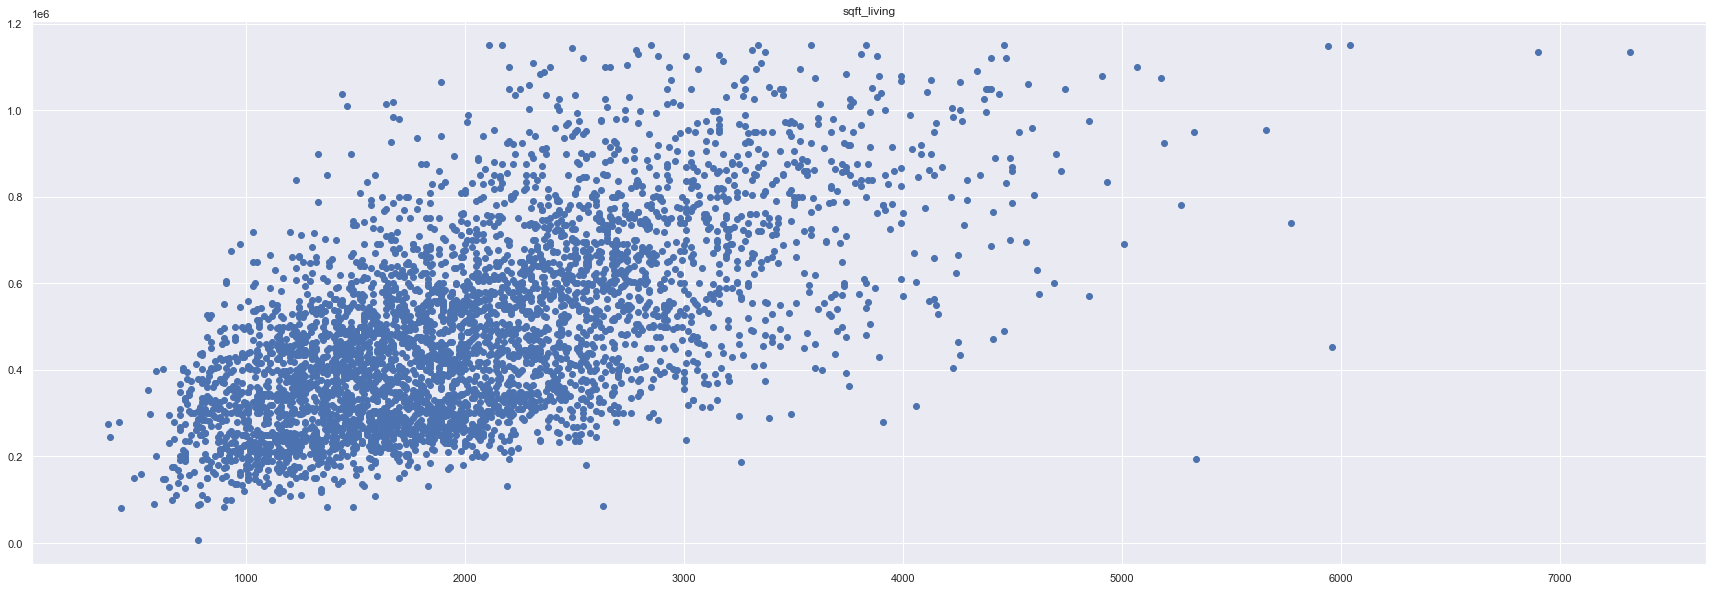

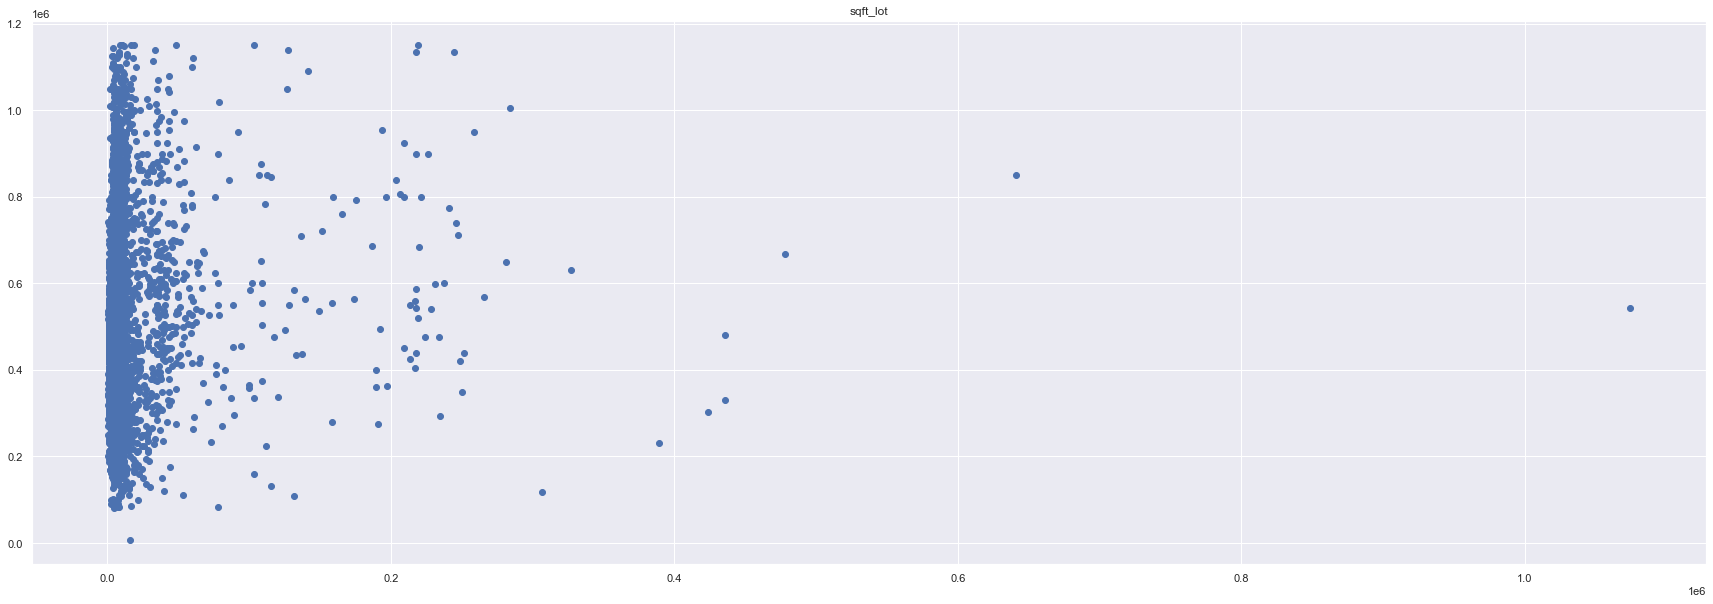

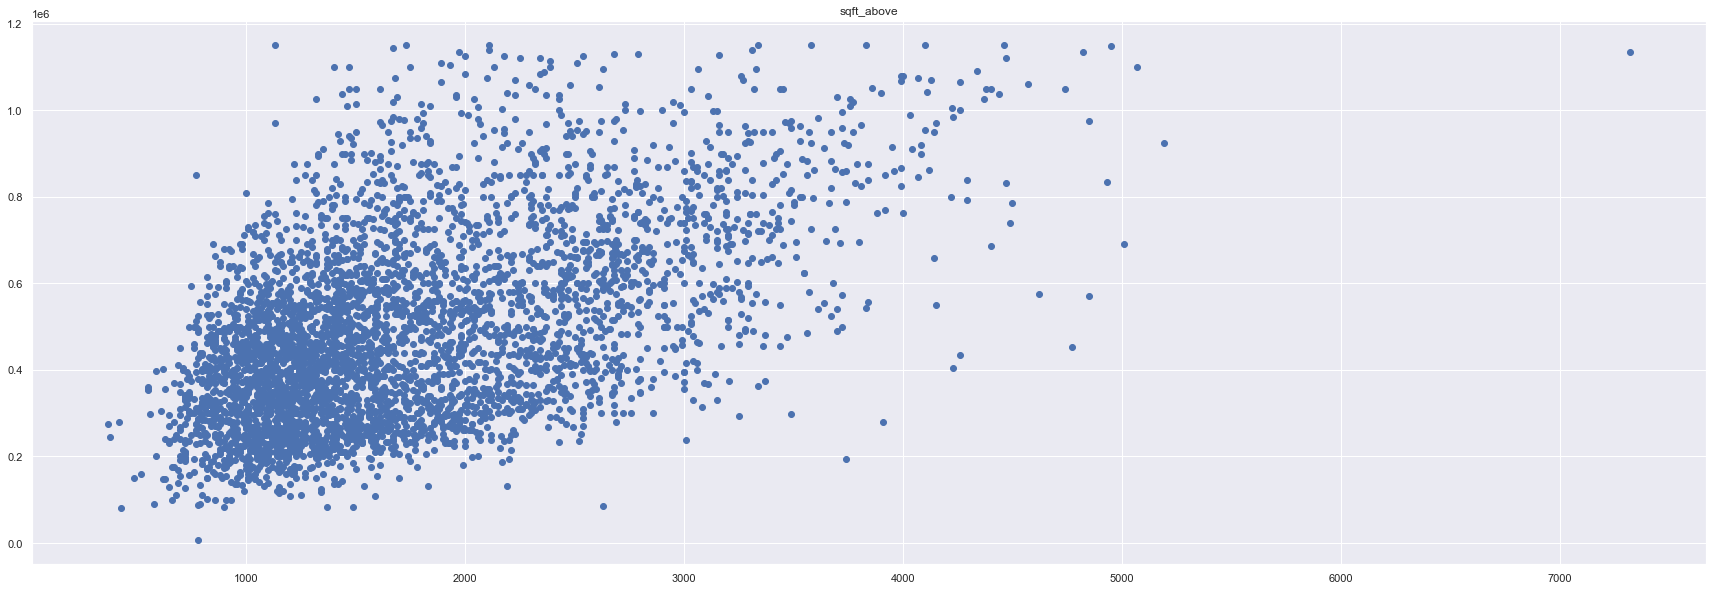

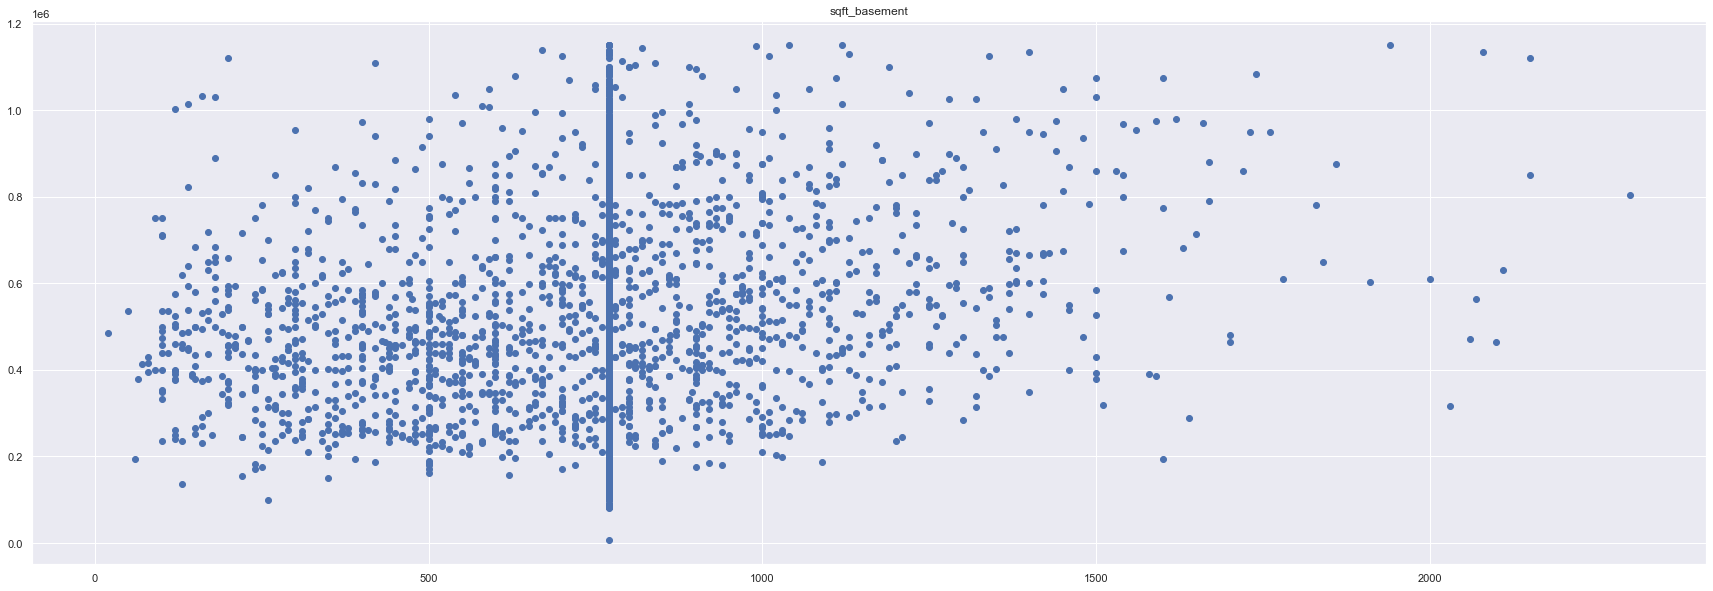

In [37]:
cl=["price","sqft_living","sqft_lot","sqft_above","sqft_basement"]
for feature in cl:
    if feature != "price":
        plt.scatter(df[feature],df['price'])
        plt.title(feature)
        plt.show()

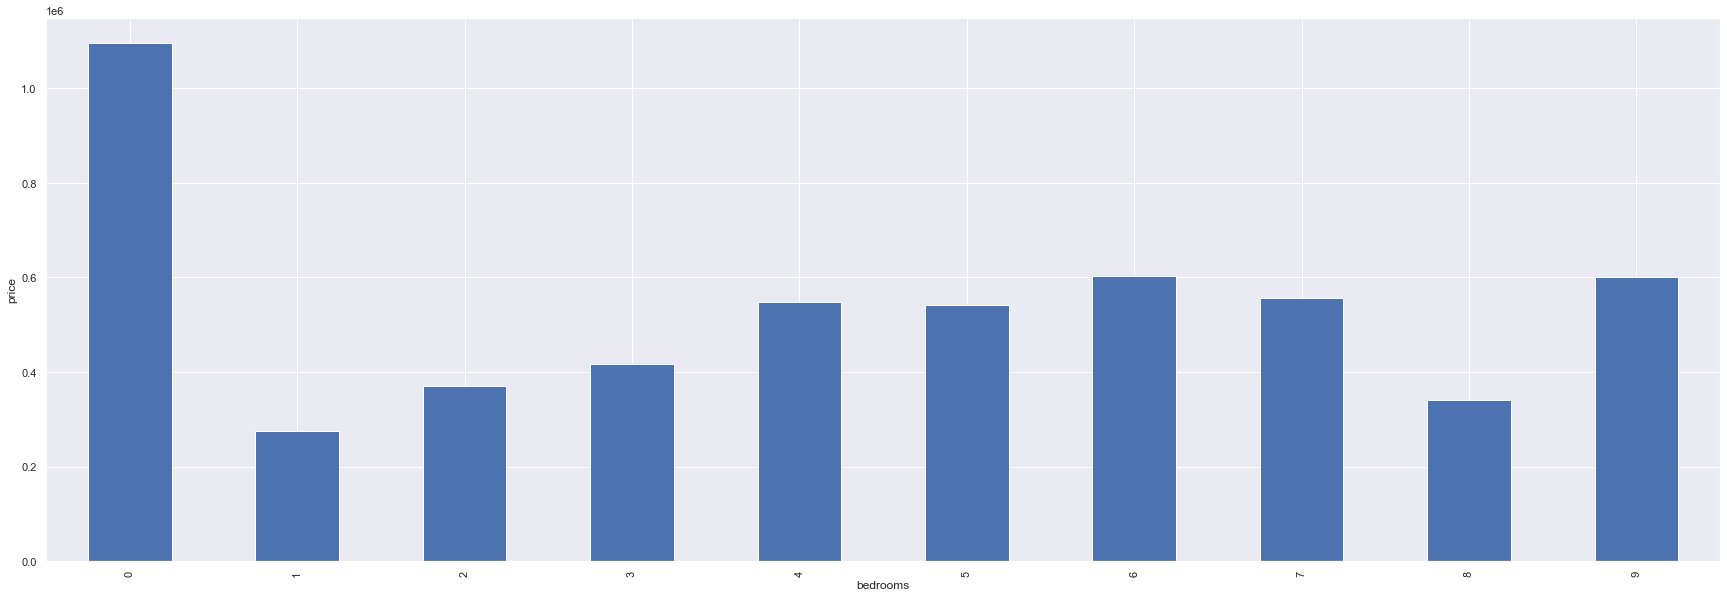

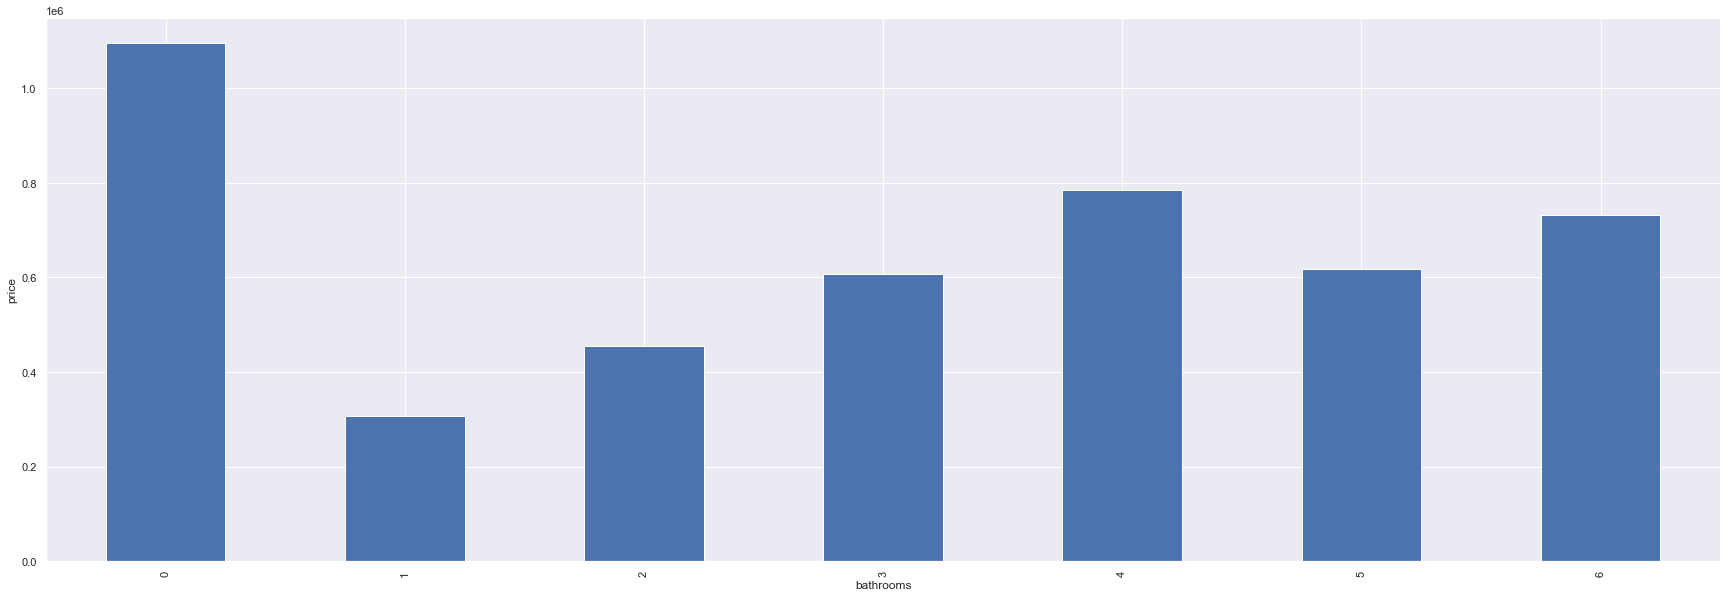

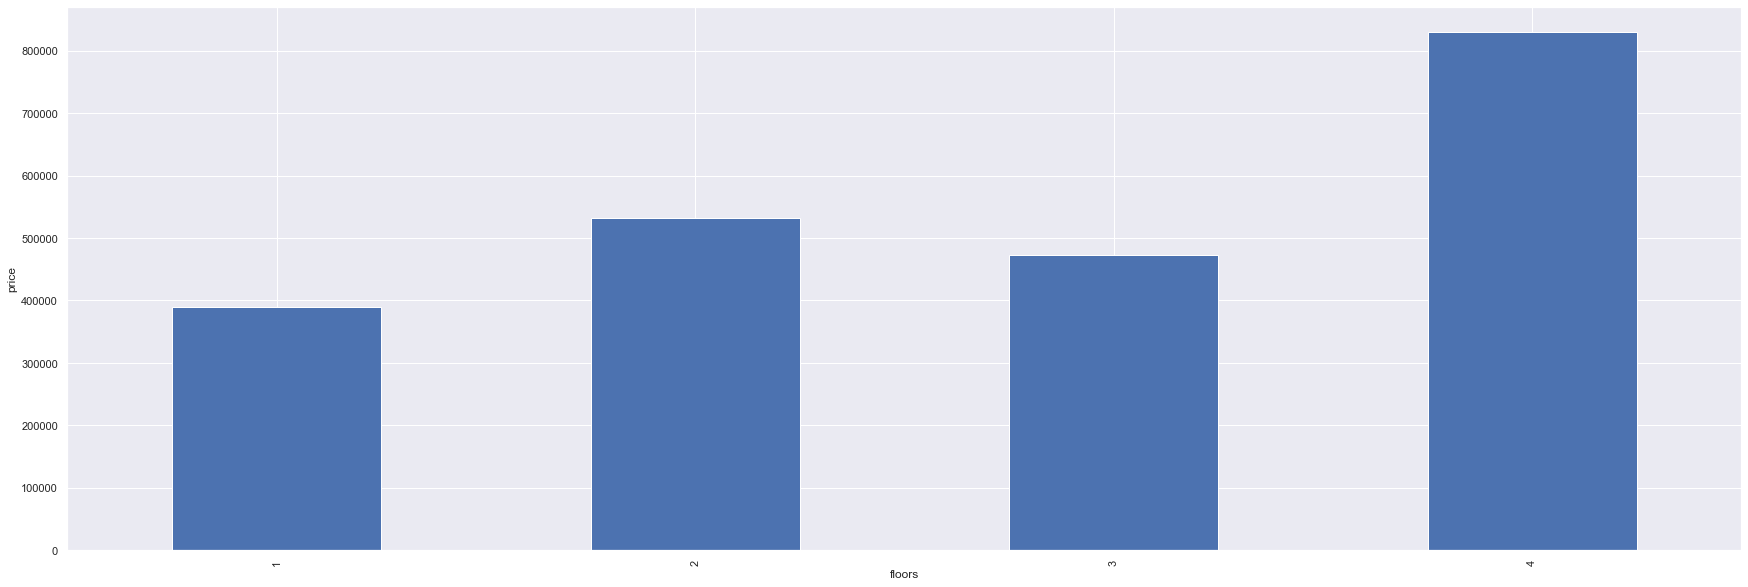

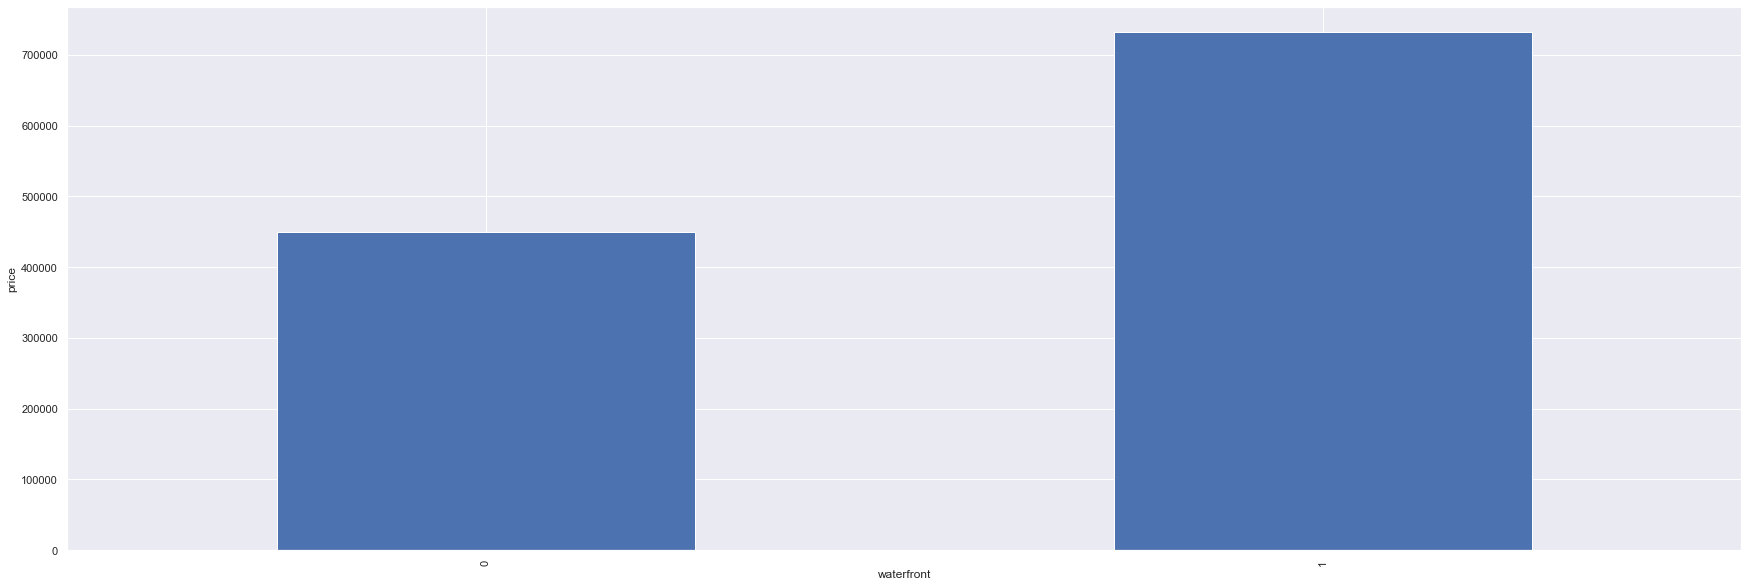

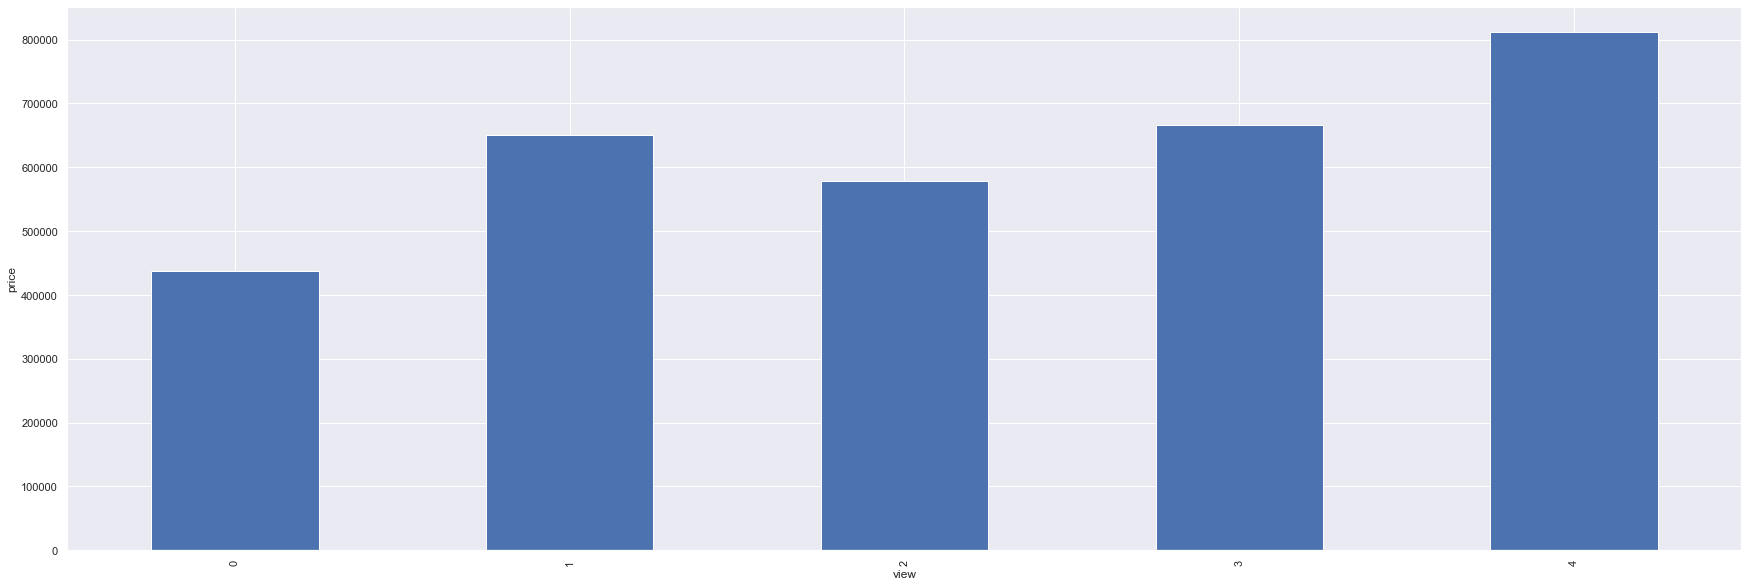

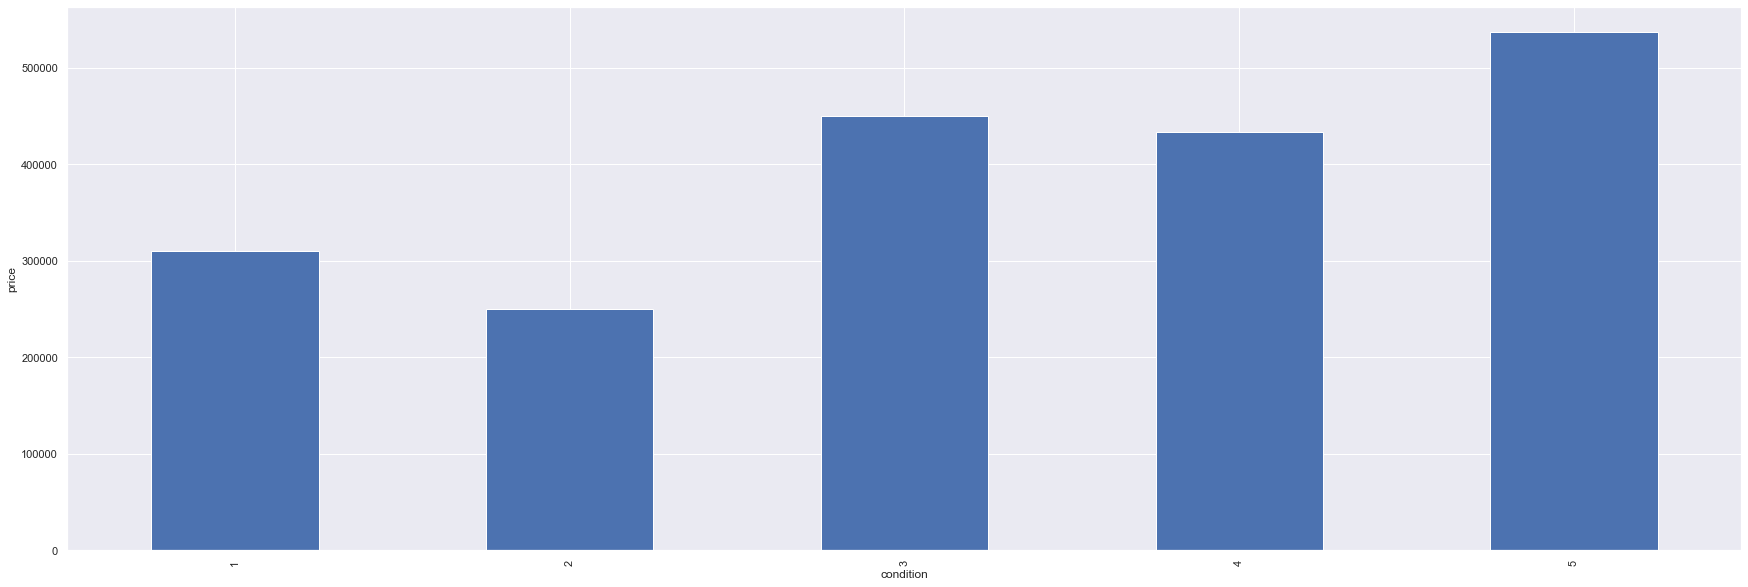

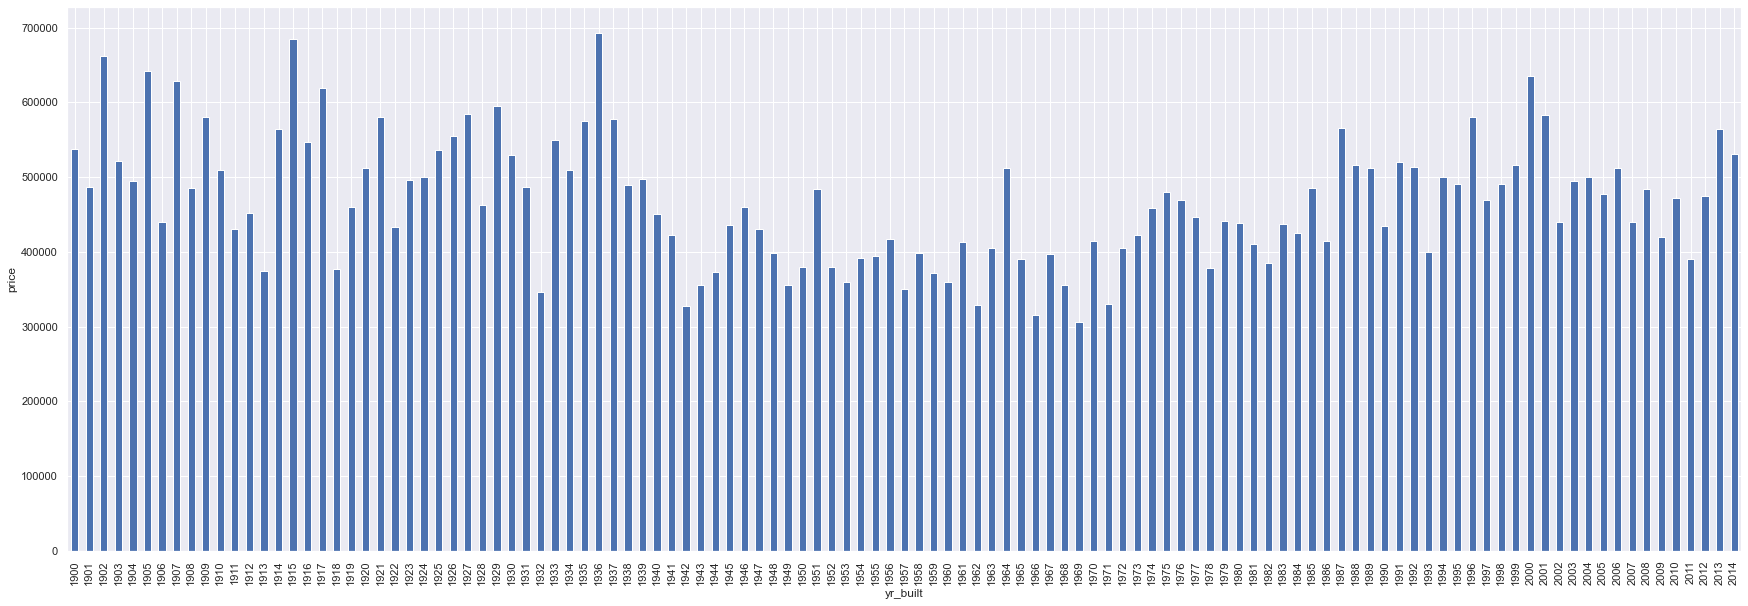

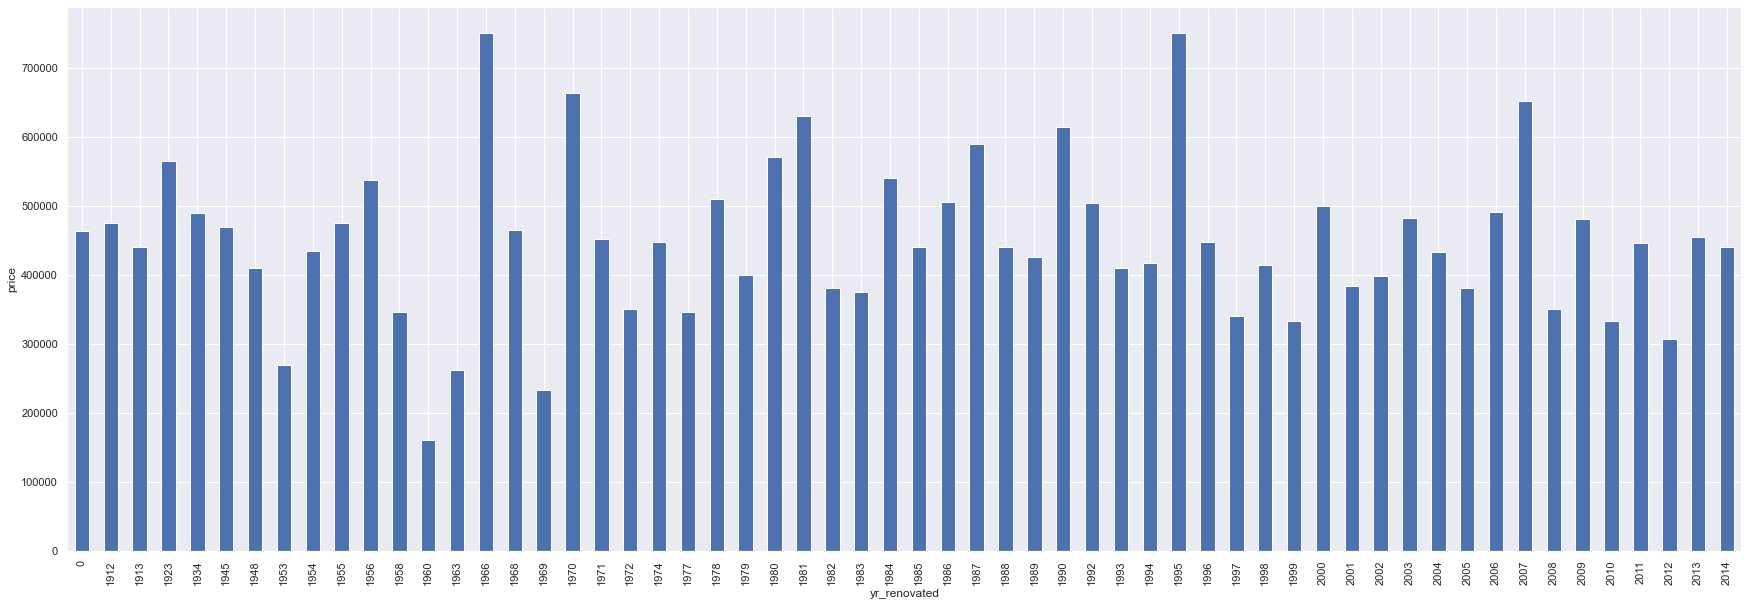

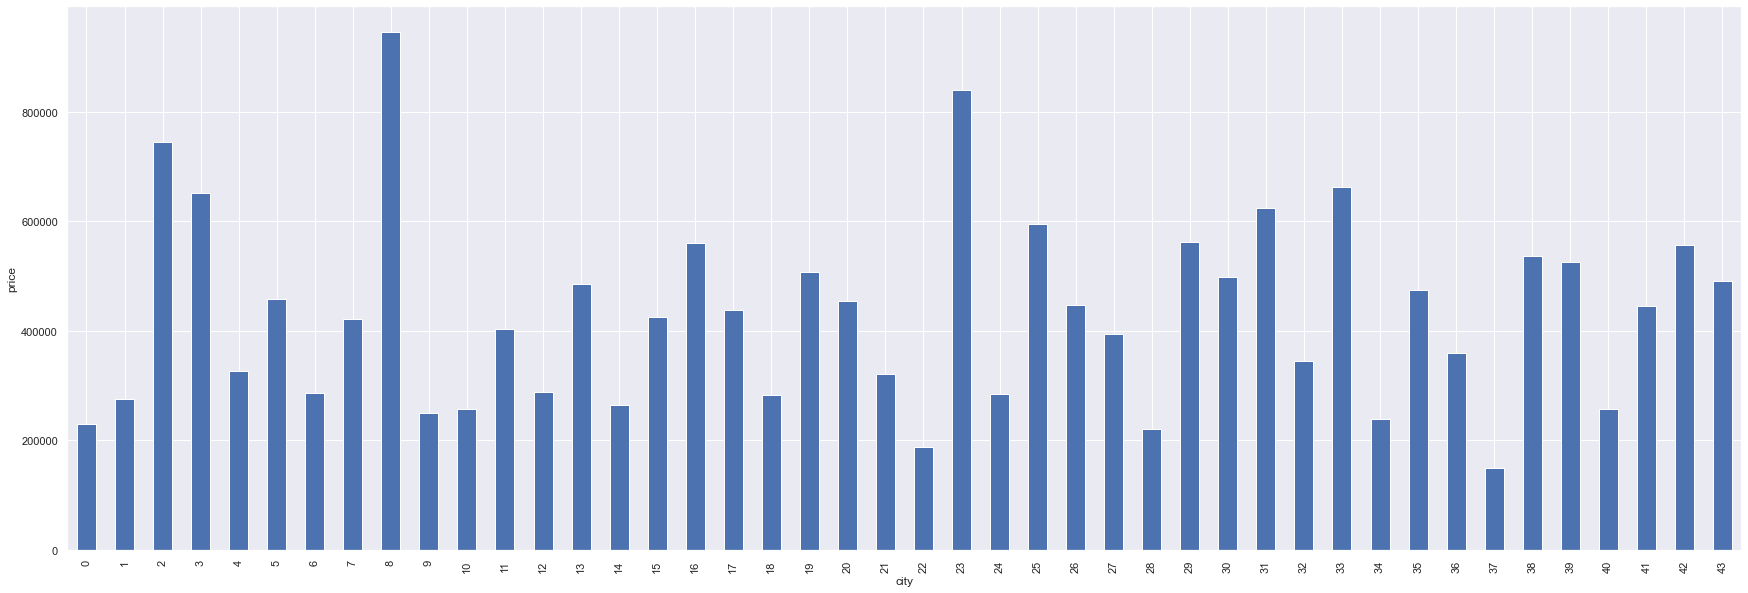

In [38]:
discrete_features=["bedrooms","bathrooms","floors","waterfront","view","condition","yr_built","yr_renovated","city"]
for feature in discrete_features:
    data = df.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.show()

# II.Data Transformation


##  Standarization:


In [39]:
from sklearn.preprocessing import StandardScaler
#Object instantiation
sc = StandardScaler()

In [40]:
scaled_features = df.copy()
col_names = ['price','bedrooms','bathrooms','floors','sqft_living','sqft_lot',"sqft_above","sqft_basement","yr_built","yr_renovated"]
features = scaled_features[col_names]

#transformation – central-reduction - mean=0,variance = 1
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
dff=pd.DataFrame(scaled_features)
print(dff)



         price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
0    -0.809039 -0.399107  -0.044252    -0.852667 -0.185035  0.829990   
2    -0.674553 -0.399107  -0.044252    -0.124312 -0.073376 -0.975301   
3    -0.312830 -0.399107  -0.044252    -0.037897 -0.181770 -0.975301   
4     0.290042  0.735821  -0.044252    -0.111967 -0.113419 -0.975301   
5     0.011794 -1.534036  -1.489487    -1.420537 -0.227429 -0.975301   
...        ...       ...        ...          ...       ...       ...   
4595 -0.831454 -0.399107  -0.044252    -0.642802 -0.227983 -0.975301   
4596  0.217388 -0.399107  -0.044252    -0.704527 -0.194416  0.829990   
4597 -0.327186 -0.399107  -0.044252     1.208949 -0.209885  0.829990   
4598 -1.317307  0.735821  -0.044252     0.073208 -0.220511 -0.975301   
4599 -1.237542 -0.399107  -0.044252    -0.667492 -0.179777  0.829990   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3   -0.533114       0.069936 

In [41]:
#we can verify that the mean is 0
print("Mean : \n",dff.mean(axis=0))


Mean : 
 price           -2.539271e-17
bedrooms        -4.095798e-16
bathrooms       -5.943466e-16
sqft_living      1.124645e-16
sqft_lot        -6.438315e-21
floors           3.259848e-16
waterfront       3.711436e-03
view             1.737416e-01
condition        3.443749e+00
sqft_above      -2.723407e-17
sqft_basement   -8.875797e-16
yr_built        -3.429690e-15
yr_renovated     4.593866e-16
city             2.579726e+01
statezip         3.901577e+01
dtype: float64


In [42]:
print("Standard Diviation : \n",np.std(dff,axis=0,ddof=0))

Standard Diviation : 
 price             1.000000
bedrooms          1.000000
bathrooms         1.000000
sqft_living       1.000000
sqft_lot          1.000000
floors            1.000000
waterfront        0.060808
view              0.644889
condition         0.669117
sqft_above        1.000000
sqft_basement     1.000000
yr_built          1.000000
yr_renovated      1.000000
city             11.913073
statezip         20.757064
dtype: float64


# III. Dimension Reduction


## PCA Method


In [43]:
#To apply the PCA method our  data must be already standerdized which
#is done previously

In [44]:
from sklearn.decomposition import PCA

In [45]:
# create the PCA instance
acp = PCA(svd_solver='full')



In [46]:
A=dff.values
#Apply acp
#coord = acp.fit(Z)
Principal_components=acp.fit_transform(dff)
#number of calculated components
print(acp.n_components_)
#print PCs
print(Principal_components)

15
[[-2.51716741e+01 -2.44236526e-01 -6.53093056e-01 ...  1.05216187e-01
   1.61022460e-01 -1.76742464e-03]
 [ 1.50743906e+01 -1.74473607e+00 -8.04396995e-01 ... -1.66724613e-02
   2.54098588e-01 -1.29775607e-03]
 [ 3.85625347e+01 -7.55787128e+00 -1.29266253e+00 ...  1.88284522e-01
  -3.96611344e-01  2.53623427e-03]
 ...
 [-6.84389469e-01  6.54253127e+00  1.47960938e+00 ... -7.71468416e-02
  -1.28678253e-01  2.73670826e-03]
 [-3.29064820e+01 -4.89209027e+00  1.79972133e-01 ...  5.42521627e-01
  -3.27055737e-01  1.20257582e-02]
 [ 1.87959830e+01 -9.91883218e+00 -6.83672629e-01 ... -4.81818820e-01
   3.43475254e-02 -1.25785257e-03]]


In [47]:
#Variance proportions associated with the axes
np.set_printoptions(3)
print(acp.explained_variance_ratio_)

#the Principle Component with biggest variance_ratio is the best thus selected to be PC1

[8.677e-01 1.144e-01 6.185e-03 2.560e-03 1.687e-03 1.617e-03 1.375e-03
 1.130e-03 9.750e-04 7.692e-04 6.035e-04 5.250e-04 4.085e-04 1.220e-04
 5.713e-06]


In [48]:
n = dff.shape[0]
p=dff.shape[1]
eigval = (n-1)/n*acp.explained_variance_
print(eigval)
#the eigenvalues of an axis reflect the variation ratio of information

[5.064e+02 6.674e+01 3.610e+00 1.494e+00 9.847e-01 9.440e-01 8.023e-01
 6.593e-01 5.690e-01 4.489e-01 3.522e-01 3.064e-01 2.384e-01 7.123e-02
 3.334e-03]


In [49]:
pca_df = pd.DataFrame(data = Principal_components[:,0:6], columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6'])
print(pca_df)

           PC 1      PC 2      PC 3      PC 4      PC 5      PC 6
0    -25.171674 -0.244237 -0.653093 -0.227828  0.408281 -0.859209
1     15.074391 -1.744736 -0.804397  0.128536 -0.493430  0.842007
2     38.562535 -7.557871 -1.292663  0.824414 -0.986999  0.924221
3      5.134750  8.009678 -0.785964  1.364887 -0.217629 -0.702014
4    -17.510663  2.107889 -2.680432  0.783574  0.540088 -0.556835
...         ...       ...       ...       ...       ...       ...
4306 -24.752559 -1.186337 -0.993220  0.794539  0.038153 -0.388705
4307  39.462301 -7.101619 -0.904295 -0.349050  0.559267 -1.422724
4308  -0.684389  6.542531  1.479609 -1.402733 -0.033397  0.213877
4309 -32.906482 -4.892090  0.179972  0.340164 -1.235971  1.142381
4310  18.795983 -9.918832 -0.683673 -1.363068 -0.476671  0.683609

[4311 rows x 6 columns]


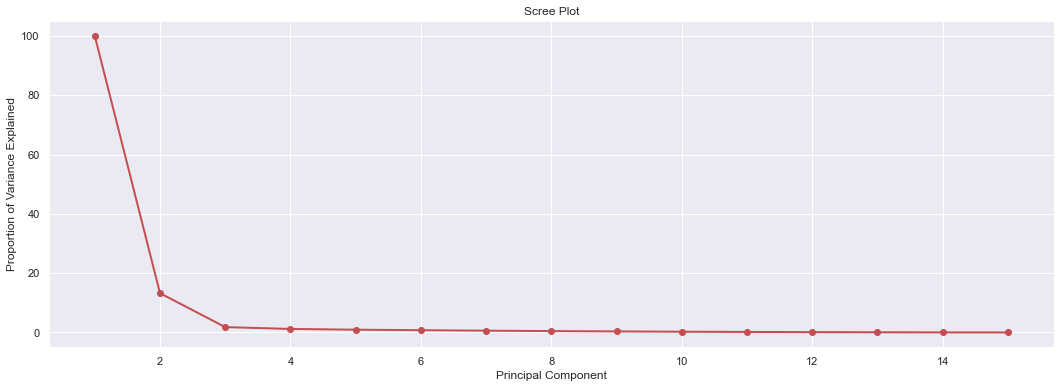

In [50]:
#show the scree plot of the PCA:
aze=np.cumsum(acp.explained_variance_ratio_[::-1])[::-1]
plt.figure(figsize=(18,6))
PC_values = np.arange(acp.n_components_) + 1
plt.plot(PC_values, aze*100, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()


In [51]:
#From this screeplot we can see that  more that 80% of the data is held in the PC1 and 10% in PC2 whereas PC3->PC14 have a
#very low amount of data held so we can have only PC1 and PC2 to work with

## Drawing the corrolation circle to better understand the corrolation between our labels

In [52]:
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[-6.580e-04  1.870e-01  6.721e-01  2.159e-01  6.089e-02 -9.282e-02
   5.202e-01  1.896e-01 -1.732e-01 -6.438e-02 -1.188e-02 -3.361e-01
   4.363e-03  2.269e-02 -1.110e-04]
 [ 1.578e-01 -8.756e-03  6.351e-01  2.858e-01 -2.346e-01 -9.561e-02
  -1.528e-01 -4.474e-01  3.753e-01 -6.649e-02  1.745e-01 -1.618e-01
  -5.348e-03  2.058e-02  1.649e-04]
 [ 1.310e-01  5.338e-02  7.498e-01 -8.904e-03 -1.067e-01 -3.965e-02
  -2.072e-02 -3.138e-01 -3.062e-01  4.177e-01 -1.640e-01  7.564e-02
   6.234e-02  3.417e-02 -8.146e-05]
 [ 1.879e-01  7.902e-02  9.020e-01  1.984e-01  1.823e-02 -2.694e-02
  -7.581e-04  3.210e-02 -5.233e-02 -1.720e-01 -3.204e-02  1.700e-01
   7.949e-03 -2.028e-01  4.410e-04]
 [ 1.210e-01  3.038e-02  1.834e-01  2.014e-01  7.865e-01  5.018e-01
  -1.173e-01 -1.178e-01  6.103e-02  6.251e-02 -3.739e-03 -6.812e-02
  -2.760e-04  7.417e-05 -1.027e-05]
 [-2.796e-02  1.484e-01  5.172e-01 -5.599e-01  1.061e-01 -1.201e-01
   9.325e-02  2.796e-01  4.290e-01  3.124e-01  6.669e-03 -1.047e-02
  -2

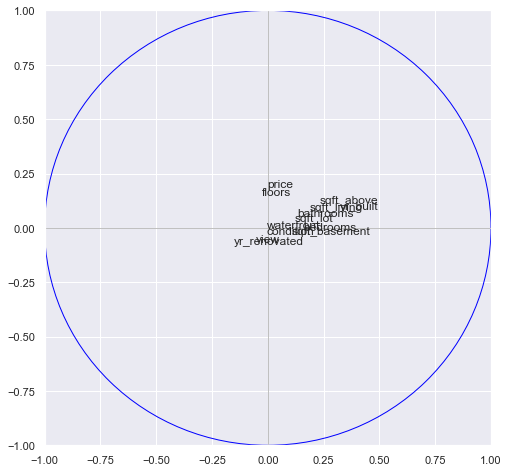

In [53]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(df.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()


# Exporting the edited dataset into a CSV file

In [54]:
dff.to_csv(r'C:\Users\Administrator\Desktop\Agency_dataset_modified.csv', index = False)